In [1]:
library(e1071)
library(caret)
#library(caTools)
library(tidyr)
library(cowplot)

Loading required package: lattice

Loading required package: ggplot2



# Import Datasets

In [2]:
pca_summary <- read.table('../data/PCA_results_sym5.tsv')
pc1 <- read.table('../data/PC1_results_sym5.tsv')
pc2 <- read.table('../data/PC2_results_sym5.tsv')
sample_ids <- read.table('../data/sample_names_20210105.tsv',sep = '\t')

## Discrete Wavelet Transform PCA results

Importing PC coordinates (PC1 and PC2) for each gene. In the imported dataframes each row is a gene's results, and eaxch column is an individual sample. There are two dataframe, one for PC1 and another for PC2.

In [3]:
rownames(pc1) <- pca_summary$V5
colnames(pc1) <- sample_ids$V2
head(pc1)

,GRO,GRO,PRO,GRO,GRO,PRO,PRO,PRO,PRO,PRO,GRO,GRO,PRO,PRO,PRO,PRO,GRO,GRO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENO1,-0.23046631,-0.2757668,-0.10550201,-0.222502333,-0.2717267,0.26184527,0.70131663,-0.09835250,-0.04183093,0.42906181,-0.2838141,-0.16426116,0.24725400,-0.05992945,0.67708564,-0.11134008,-0.16695510,-0.2841159
RPL11,0.12842288,0.2520971,-0.12353770,0.077820757,0.2927522,-0.14901388,-0.32515404,-0.11536529,-0.07412614,-0.17663345,0.3007536,0.06180107,-0.14171632,-0.11637006,-0.22506693,-0.11623234,0.09351629,0.3560523
SNHG3,-0.19580001,-0.1927457,-0.08848614,-0.169532104,-0.1818726,0.32433276,0.38641842,-0.08239768,-0.05712132,0.36154657,-0.2288086,-0.14193496,0.38719888,-0.07787528,0.40629301,-0.09186205,-0.14957009,-0.2077832
SNORA73B,-0.10863290,-0.1430299,0.44981436,-0.146318404,-0.1399467,-0.14373808,-0.12534385,0.46613263,-0.14310872,-0.13170777,-0.1546222,-0.08498909,-0.16905784,0.45617903,-0.15329237,0.45247494,-0.02475681,-0.1560564
RCC1,-0.21242006,-0.2069684,-0.04891086,-0.183591824,-0.1930652,0.35315080,0.39787088,-0.05638477,-0.06264933,0.43799250,-0.2477650,-0.15208340,0.32242949,-0.06298068,0.35767590,-0.05263661,-0.16135413,-0.2283092
SNORA73A,-0.01157087,-0.2509863,0.31002402,-0.006950481,-0.1747389,-0.08010212,-0.01209441,0.23656880,-0.02455766,-0.06460699,-0.1549924,-0.01493898,-0.05220915,0.27829498,-0.04598731,0.28571913,-0.04211348,-0.1747579


In [4]:
rownames(pc2) <- pca_summary$V5
colnames(pc2) <- sample_ids$V2
head(pc2)

,GRO,GRO,PRO,GRO,GRO,PRO,PRO,PRO,PRO,PRO,GRO,GRO,PRO,PRO,PRO,PRO,GRO,GRO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENO1,-0.11609332,-0.17896920,0.22134953,-0.10515142,-0.17207981,-0.003640118,-0.06513750,0.26140412,0.3201205029,-0.03814975,-0.19600558,-0.02366629,-0.02909089,0.38363055,-0.15729486,0.18290547,-0.0341381705,-0.24999326
RPL11,0.01779576,-0.05432685,0.05482999,0.02227944,-0.06358273,-0.080726430,-0.22047456,0.05753536,0.5347817283,-0.09540633,-0.06156378,0.01809763,-0.06982234,0.04811856,-0.10462581,0.05012089,0.0189133376,-0.07194387
SNHG3,-0.13826882,-0.11621423,0.25976952,-0.10770002,-0.10293577,-0.046318810,-0.03247017,0.28402958,-0.0009259853,-0.04570654,-0.15127575,-0.07171419,-0.04717208,0.29196035,-0.03490833,0.27344982,-0.0840242004,-0.12957437
SNORA73B,0.31715350,0.06467923,-0.01188616,0.30768936,0.04131020,-0.179860125,-0.19748500,-0.02182400,0.0027802945,-0.23545307,0.07301532,0.11113943,-0.22809335,-0.01373702,-0.23307411,-0.01474195,0.1696113482,0.04877610
RCC1,-0.13064017,-0.10746782,0.28754655,-0.10066938,-0.09231303,-0.059413394,-0.05902125,0.25053567,0.0853658725,-0.07392097,-0.14569650,-0.06218825,-0.05061554,0.22094703,-0.04903863,0.29027635,-0.0735226040,-0.13016393
SNORA73A,0.01760952,0.24862853,0.09352574,-0.01463061,0.14303774,-0.196691239,-0.13795559,0.05127885,-0.0417288554,-0.18247738,0.11343142,-0.03109552,-0.17278633,0.05635049,-0.14641452,0.08005603,-0.0008447196,0.12070645


# SVM 

## Leave-one-out cross-validation

In [5]:
multi_gene_cv <- function(pca1, pca2, levels, N=10, K=18) {

    #' Perform svm cross-validation on PC1 and PC2 values from DWT
    #' 
    #' @description Run svm cross-validation on multiple genes to determine how many
    #' genes accurately label protocol
    #'
    #' @param pca1 data.frame. of pc1 valuers (row=genes, columns=samples)
    #' 
    #' @param pca1 data.frame. of pc2 valuers (row=genes, columns=samples)
    #' 
    #' @param levels lists of factor levels eg. c("GRO","PRO")
    #'
    #' @param N number of genes to evaluate in the original pca summary data frame (default = 10)
    #'
    #' @param K number of Cross Validations (default = 18)
    #'
    #' @usage multi_gene_cv(pca1, pca2, levels, N=10, K=18)
    #'
    #' @return cv_df a data frame with accuracy of each fold
    #'
    #' @export

    #Initialize a data.frame of K+1 by N
    cv_matrix <- matrix(0, ncol = K+1, nrow = N)
    cv_df <- data.frame(cv_matrix)
    colnames(cv_df) <- c("id", paste0("Fold",seq(1,K,1)))
    
    for(i in 1:N){
        
        #subset the data by rows specifying the genes 
        dataset_pc1 <- pca1[i,]
        dataset_pc2 <- pca2[i,]

        #creating a transformed dataframe of the pc values
        dataset <- as.data.frame(t(rbind(dataset_pc2, dataset_pc1)))
        colnames(dataset) <- c("pc2", "pc1")
        dataset$protocol <- colnames(dataset_pc1)

        #set protocol as factor
        dataset$protocol <- factor(dataset$protocol, levels = levels)
        
        #specify the target feature (dependent variable) and # of folds
        folds <- createFolds(dataset$protocol, k = K)

        #apply a function to the 'folds'
        cv_all <- lapply(folds, function(x) { 

          #separate the training set and test set (1 test vs 17 train default)
          training_fold <- dataset[-x, ] # training fold = training set 
          test_fold <- dataset[x, ] #the test fold individually

          #now apply (train) the classifer on the training_fold
          classifier <- svm(formula = protocol ~ .,
                           data = training_fold,
                           kernel = 'linear')

          #next we calculate the predictions and cm and calculate the accuracy
          #training on training_fold and testing its accuracy on the test_fold
          y_pred <- predict(classifier, newdata = test_fold[-3])
          cm <- table(test_fold[, 3], y_pred)
          accuracy <- (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
          return(accuracy)

        })

        #write the per gene fold accuracy values to dataframe
        gene <- rownames(dataset_pc1)
        cv_df[i,] <- c(gene, cv_all)

    }
    
    return(cv_df)
    
}

In [6]:
protocol_loocv <- multi_gene_cv(pc1, pc2, c('GRO', 'PRO'), N=nrow(pc1))

In [7]:
cv_gather <- protocol_loocv %>% gather(key, value, -id) 

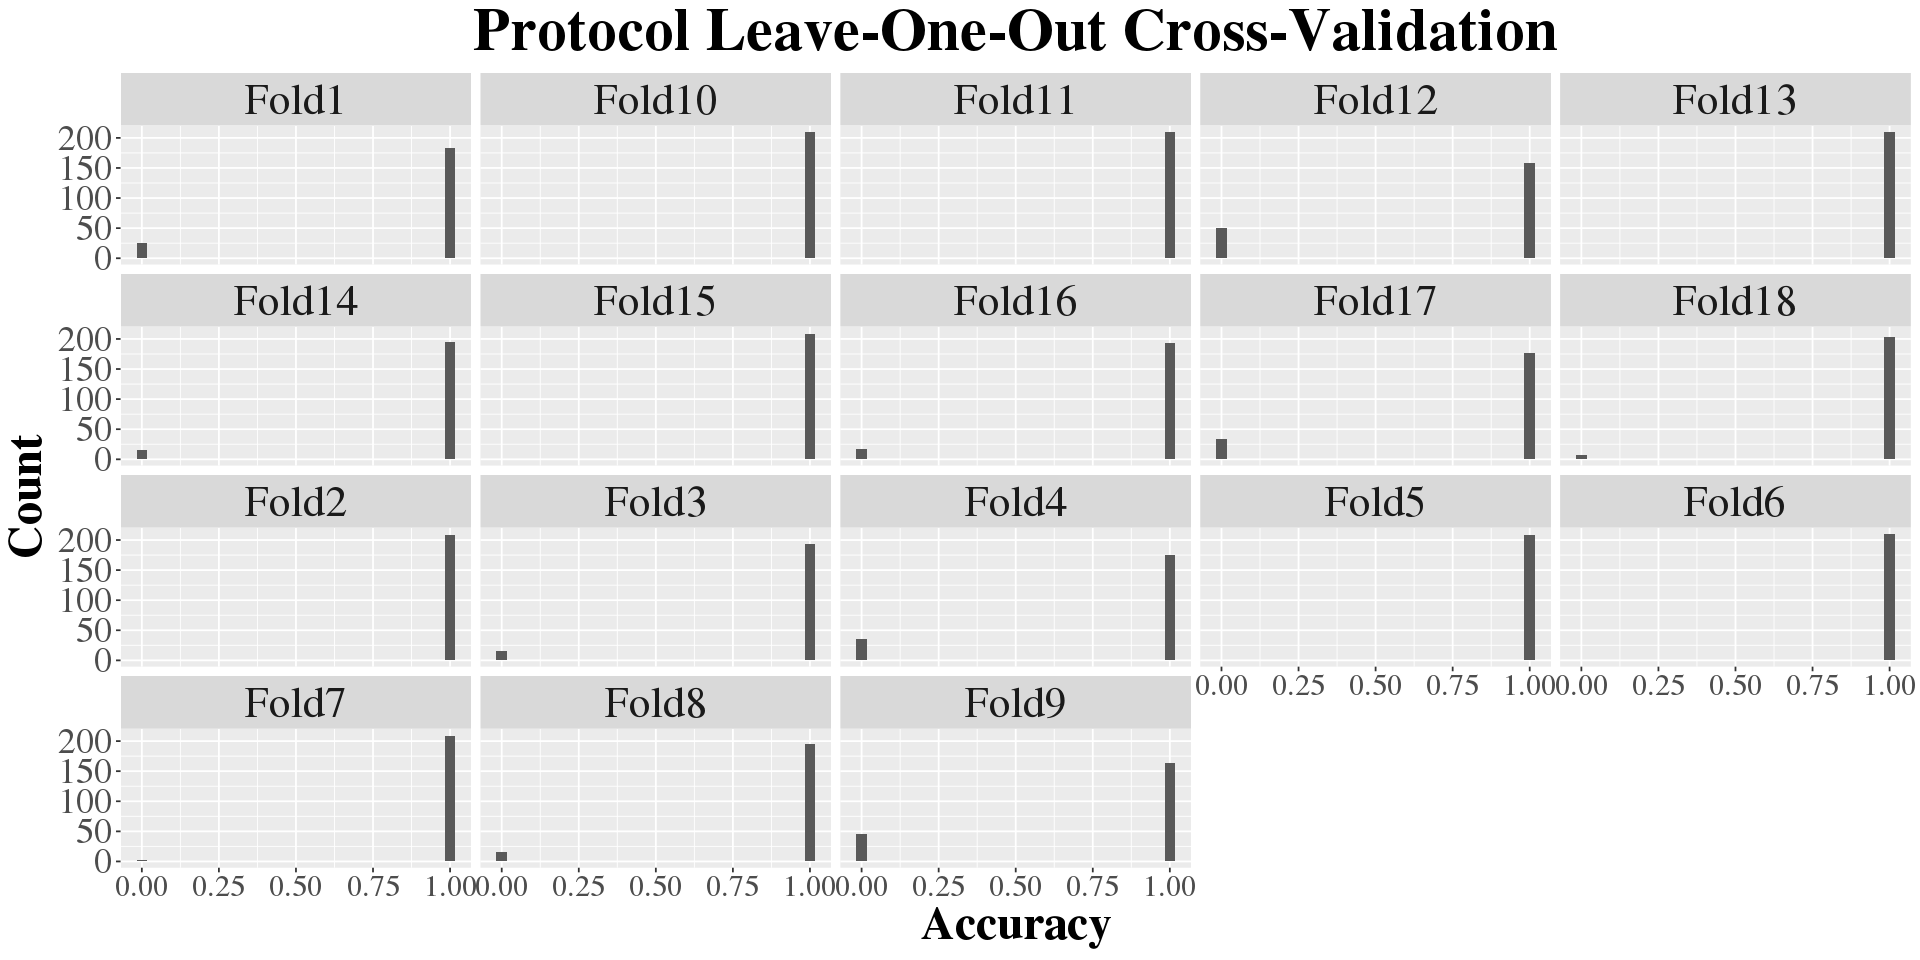

In [8]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(cv_gather, aes(value)) + 
    geom_histogram(bins = 30) + 
    facet_wrap(~key) +
    xlab('Accuracy') + ylab('Count') +
    ggtitle("Protocol Leave-One-Out Cross-Validation") +
    theme(plot.title = element_text(hjust = 0.5, family="Times"),
          title = element_text(size = 30, family="Times", face = "bold"), 
          axis.title = element_text(size = 28, family="Times", face = "bold"), 
          axis.text.y = element_text(size = 22, family="Times"),
         axis.text.x = element_text(size = 18, family="Times")) +
theme(strip.text.x = element_text(size = 26, ,family="Times"))

In [9]:
sample_accuracy_rate <- sample_ids
sample_accuracy_rate$accurate_genes <- colSums(protocol_loocv[c(2:19)])
sample_accuracy_rate$percent_accuracy <- (colSums(protocol_loocv[c(2:19)])/210)*100
sample_accuracy_rate$id <- paste0(sample_accuracy_rate$V2, '-',sample_accuracy_rate$V3)
sample_accuracy_rate

V1,V2,V3,V4,accurate_genes,percent_accuracy,id
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>
i18_GTCCGC_L008_R1_001,GRO,LIG,NUTLIN,184,87.61905,GRO-LIG
SRR4090101,GRO,CIRC,NUTLIN,209,99.52381,GRO-CIRC
DMSO-2_S2_R1_001,PRO,TSRT,DMSO,194,92.38095,PRO-TSRT
i17_GTAGAG_L008_R1_001,GRO,LIG,DMSO,175,83.33333,GRO-LIG
SRR4090099,GRO,CIRC,DMSO,209,99.52381,GRO-CIRC
Nuria_Nutlin_S7,PRO,LIG,NUTLIN,210,100.00000,PRO-LIG
Sam_DMSO_S9,PRO,LIG,DMSO,208,99.04762,PRO-LIG
Nutlin-1_S3_R1_001,PRO,TSRT,NUTLIN,195,92.85714,PRO-TSRT
DMSO_HCT116_RPI_26_S1_R1_001,PRO,LIG,DMSO,164,78.09524,PRO-LIG


In [10]:
labs <- c('i18_GTCCGC_L008_R1_001'='GRO-LIG', 'SRR4090101'='GRO-CIRC', 'DMSO-2_S2_R1_001'='PRO-TSRT',
          'i17_GTAGAG_L008_R1_001'='GRO-LIG', 'SRR4090099'='GRO-CIRC', 'Nuria_Nutlin_S7'='PRO-LIG',
          'Sam_DMSO_S9'='PRO-LIG', 'Nutlin-1_S3_R1_001'='PRO-TSRT', 'DMSO_HCT116_RPI_26_S1_R1_001'='PRO-LIG',
          'Chi_DMSO_S9'='PRO-LIG', 'SRR4090100'='GRO-CIRC', 'i13_AGTCAA_L008_R1_001'='GRO-LIG',
          'Nuria_DMSO_S6'='PRO-LIG', 'DMSO-1_S1_R1_001'='PRO-TSRT', 'Chi_Nutlin_S10'='PRO-LIG',
          'Nutlin-2_S4_R1_001'='PRO-TSRT', 'i14_AGTTCC_L008_R1_001'='GRO-LIG', 'SRR4090098'='GRO-CIRC')

length(labs)

[1] 18

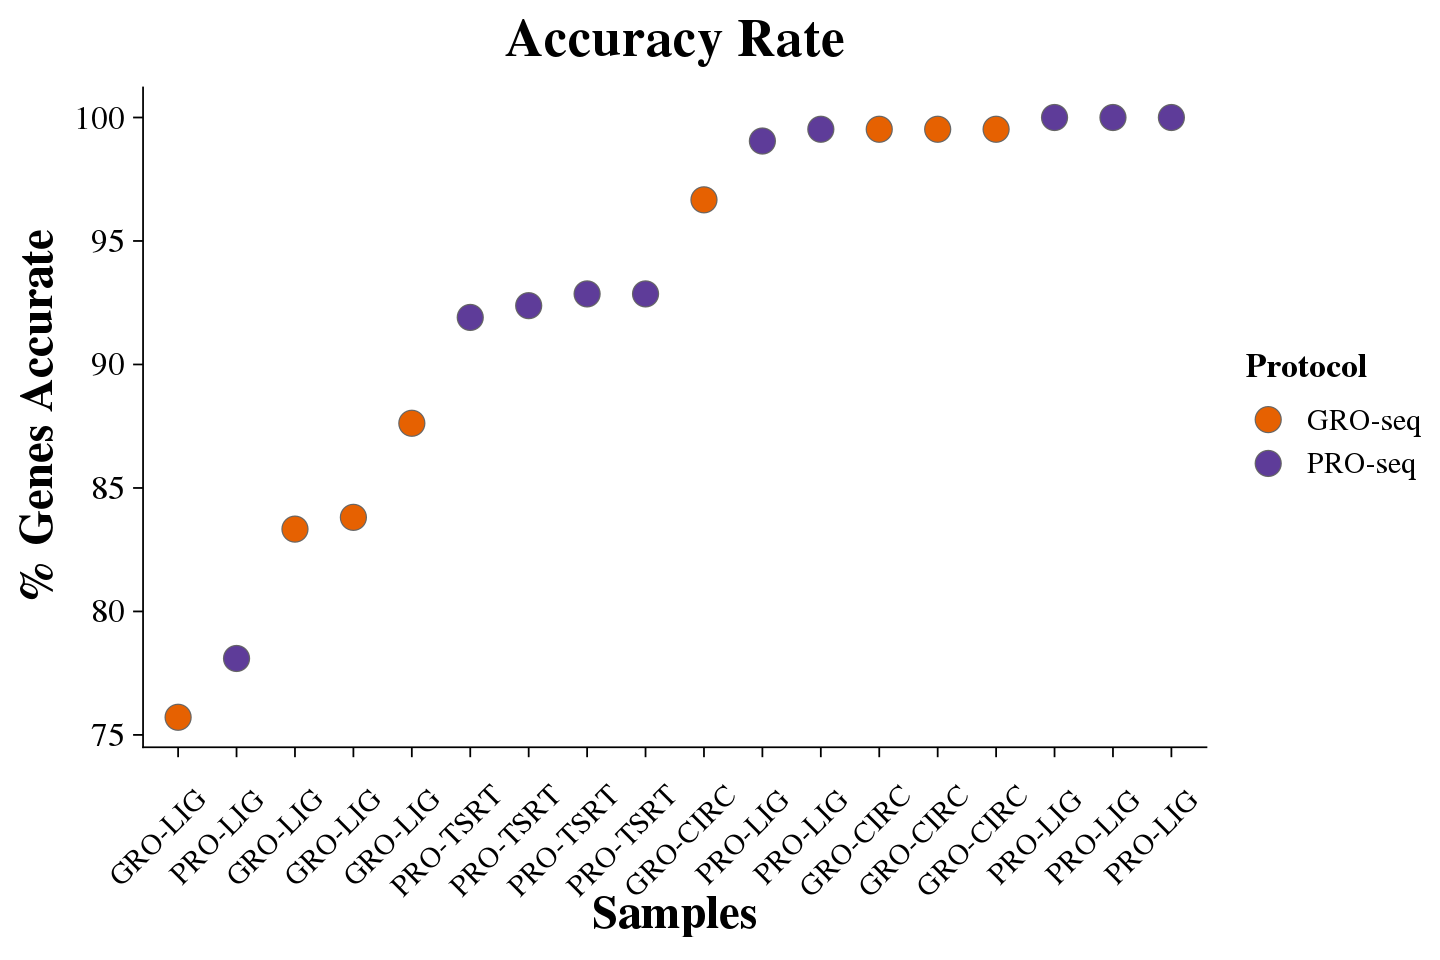

In [11]:
options(repr.plot.width=12, repr.plot.height=8)

a <- ggplot(sample_accuracy_rate, aes(x=reorder(V1, percent_accuracy),
                                 y=percent_accuracy, fill=V2)) + 
            geom_point(size=7, shape=21,color="gray40") + 
            theme_cowplot(24) +
            scale_fill_manual(name='Protocol',
                              values = c('#e66101','#5e3c99'),
                             labels = c("GRO-seq", "PRO-seq")) +
            ggtitle("Accuracy Rate") +
            ylab("% Genes Accurate") +
            xlab("Samples") +
            scale_x_discrete(labels=labs) +
            theme(plot.title = element_text(hjust = 0.5, family="Times"),
                  title = element_text(size = 28, family="Times", face = "bold"), 
                  axis.title = element_text(size = 28, family="Times", face = "bold"), 
                  axis.text = element_text(size = 20, family="Times"),
                  axis.text.x = element_text(size = 18, family="Times",angle = 45, vjust=0.6, hjust=0.75),
                 legend.title = element_text(size = 20, family="Times"),
                 legend.text = element_text(size = 18,family="Times")) 

a

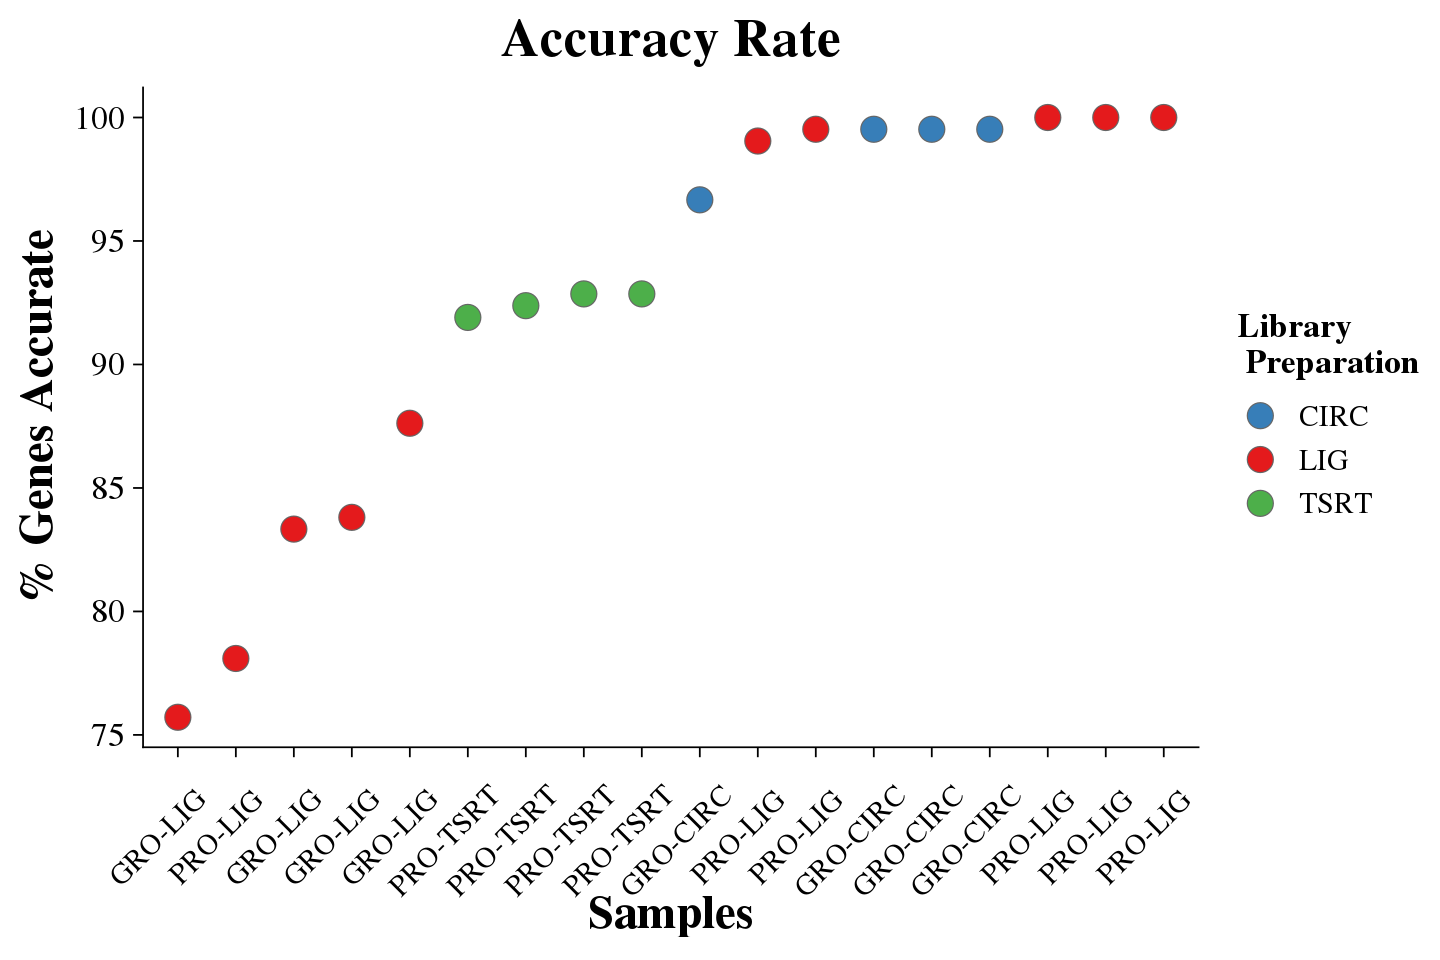

In [12]:
options(repr.plot.width=12, repr.plot.height=8)

b <- ggplot(sample_accuracy_rate, aes(x=reorder(V1, percent_accuracy),
                                 y=percent_accuracy, fill=V3)) + 
            geom_point(size=7, shape=21,color="gray40") + 
            theme_cowplot(24) +
            scale_fill_manual(name='Library \n Preparation',
                              values = c('#377EB8','#E41A1C','#4DAF4A')) +
            ggtitle("Accuracy Rate") +
            ylab("% Genes Accurate") +
            xlab("Samples") +
            scale_x_discrete(labels=labs) +
            theme(plot.title = element_text(hjust = 0.5, family="Times"),
                  title = element_text(size = 28, family="Times", face = "bold"), 
                  axis.title = element_text(size = 28, family="Times", face = "bold"), 
                  axis.text = element_text(size = 20, family="Times"),
                  axis.text.x = element_text(size = 18, family="Times",angle = 45, vjust=0.6, hjust=0.75),
                 legend.title = element_text(size = 20, family="Times"),
                 legend.text = element_text(size = 18,family="Times"))

b

In [13]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_1.1.1   tidyr_1.1.2     caret_6.0-86    ggplot2_3.3.3  
[5] lattice_0.20-38 e1071_1.7-4    

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-4         tidyselect_1.1.0     repr_1.1.0          
 [4] purrr_0.3.4          reshape2_1.4.4       splines_3.6.0       
 [7] colorspace_2.0-0     vctrs_0.3.6          gene